# Homework 4: Analyzing Rates of Sea Level Rise
In this homework, you'll investigate sea level change using data from the ECCO state estimate. You'll look at spatial differences over the past few decades and then compare how sea level on the California coast compares to the global mean.

Begin by importing the modules you'll need for this notebook:

In [1]:
# import packages here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr
import os

## Part 1: Download Sea Surface Height Data
To begin this exercise, download all of the available sea surface height data (1992-2017) from the ECCO Version 4 Release 4 output. There are several different variables for sea surface height pertaining to different components and corrections. In this homework, we'll use the `SSHDYN` variable which is equivalent to what satellites would measure from space.

To obtain the data, use the [Downloading ECCO Data](https://github.com/ProfMikeWood/ocean_modeling_book/blob/main/tools/Downloading%20ECCO%20Data.ipynb) notebook provided with the course notes.

In [2]:
# define the path to the folder where the SSH data has been download on your machine
ssh_folder = '/Users/sherine_aldrin/Downloads/CS-185C/Data/ECCO/Version4/Release4/interp_monthly/SSHDYN'

## Part 2: Plot Total Sea Level Rise 1992-2017
As a first look into how sea level has changed in the past several decades, we'll look at the differences between two time periods at the beginning and end of the available model output: January 1992 and January 2017. It is important to use the same month because variations in sea level also have a seasonal cycle (as we'll see below). Begin by reading in the data:

In [3]:
# read in the longitude, latitude, and model ssh grid in January 1992 (SSHDYN_1992_01.nc)
ds_1992 = xr.open_dataset(ssh_folder + '/SSHDYN_1992_01.nc')

longitude = np.array(ds_1992['longitude'][:])
latitude = np.array(ds_1992['latitude'][:])
SSHDYN_1992 = np.array(ds_1992['SSHDYN'][:])

ds_1992.close()

# read in the model ssh grid in January 2017 (SSHDYN_2017_01.nc)
ds_2017 = xr.open_dataset(ssh_folder + '/SSHDYN_2017_01.nc')
SSHDYN_2017 = np.array(ds_2017['SSHDYN'][:])

ds_2017.close()
SSHDYN_2017

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.42603302, -0.42603302, -0.42603302, ..., -0.42603302,
         -0.42603302, -0.42603302],
        [-0.43157652, -0.43157652, -0.43157652, ..., -0.43157652,
         -0.43157652, -0.43157652],
        [-0.4401066 , -0.4401066 , -0.4401066 , ..., -0.4401066 ,
         -0.4401066 , -0.4401066 ]]])

Now, make a plot of the difference between January 2017 and January 1992. Be sure to add a colorbar with a divergent colormaps and set the color bounds to be equal in the positive and negative directions.

In [4]:
SSHDYN_diff = SSHDYN_2017 - SSHDYN_1992

<function matplotlib.pyplot.show(close=None, block=None)>

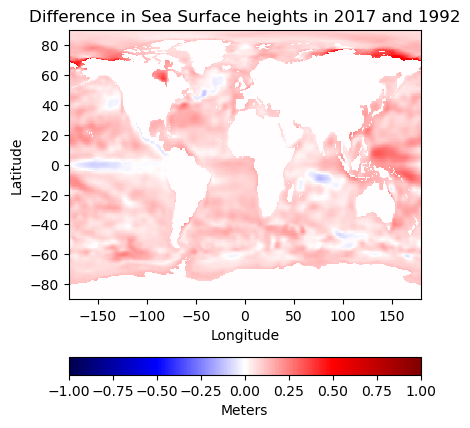

In [5]:
# make a plot of the differences between 2017 and 1992
fig = plt.figure(figsize=(10,5))

# enter your plotting code here
plt.subplot(1,2,2)
C = plt.pcolormesh(longitude,latitude,SSHDYN_diff[0, :, :], vmin = -1, vmax =1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='Meters' )

plt.title('Difference in Sea Surface heights in 2017 and 1992');
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.tight_layout()
plt.show

### Questions:
Where are the largest increases in sea level observed between these two time periods? Are there any locations on the globe where sea level has fallen? If so, where?

Answer: The largest increases in sea level between 1992 and 2017 seem to be between 0.5 and 0.75 meters around 70ºN, and it seems to have fallen just between 0 and 0.25 meters around the equator, 50ºN, and 50ºS.

## Part 3: Create a Timeseries of Sea Surface Height in California
Next, we'll make a timeseries of sea surface height at a point off the California coast near San José. A close location in the model is at 37$^{\circ}$N, 122$^{\circ}$W. Begin by finding the closest row and column in the model grid to this longitude and latitude.

In [6]:
# define the latitude and longitude
lon = -122
lat = 37

# find the row and column closest to the location of the point off the CA coast
# find the lon index closest to 122 W
lon_index = np.argmin(np.abs(longitude - (lon)))
    # find the lat index closest to 37 N
lat_index = np.argmin(np.abs(latitude - (lat)))

# note that you have already read in the longitude and latitude if the grid to make the plot above
print('The longitude at index',lon_index,'is',longitude[lon_index])
print('The latitude at index', lat_index,'is',latitude[lat_index])

The longitude at index 115 is -122.25
The latitude at index 253 is 36.75


Now, armed with your sample location, loop through each sea surface height file to make a timeseries of sea level rise between 1992 and 2017. Every time you access a file, sample the model grid at the row and column you identified above.

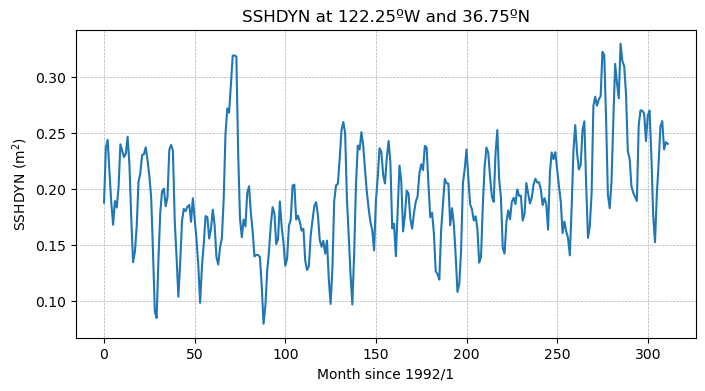

In [7]:
# create a timeseries of ssh at the point above by looping through all of the ssh files
# each time through the loop, sample the ssh grid at the row and column identified above
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second

file_list = []

# loop through the 12 months
for year in range(1992,2018):
    for month in range(1,13):
        file_list.append('SSHDYN'+'_'+str(year)+'_'+'{:02d}'.format(month)+'.nc')


# make a list to store the sshdyn values
sshdyn_values = np.zeros((len(file_list),))

# loop through each file
for i in range(len(file_list)):
    # identify path to the data file
    month_file = os.path.join(ssh_folder, file_list[i])
    
    # read in the data 
    ds = xr.open_dataset(month_file)
    
    #sample the ssh grid at the row and column identified above
    SSHDYN_sample = np.array(ds['SSHDYN'][:])
    
    
    
    ds.close()
   # print(SSHDYN_TimeSample)
    sshdyn_sub = SSHDYN_sample[0, lat_index, lon_index]

    sshdyn_values[i] = np.sum(sshdyn_sub)


fig = plt.figure(figsize=(8,4))
plt.plot(sshdyn_values)
plt.title('SSHDYN at 122.25ºW and 36.75ºN')
plt.ylabel('SSHDYN (m$^2$)')
plt.xlabel('Month since 1992/1')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

## Part 4: Create a Timeseries of Global Mean Sea Surface Height
Next, make a timeseries of sea surface height averaged across the globe. Your loop should look quite similar to that above - you'll just need to make a slight change to average across the whole ocean rather than sampling at a single point.

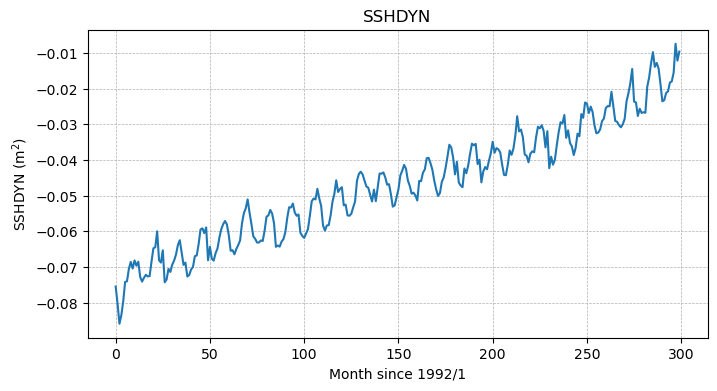

In [8]:
# create a timeseries of the global mean ssh by looping through all of the ssh files
# each time through the loop, take the mean of the ssh grid       #### at the row and column identified above
# when you take the mean, be sure to exclude 0 values, which pertain to land
# your timeseries should be an (N,2) array with time in the first column and ssh values in the second

file_list = []

# loop through the 12 months
for year in range(1992,2017):
    for month in range(1,13):
        file_list.append('SSHDYN'+'_'+str(year)+'_'+'{:02d}'.format(month)+'.nc')


# make a list to store the sshdyn values
sshdyn_all_values = np.zeros((len(file_list),))

# loop through each file
for i in range(len(file_list)):
    # identify path to the data file
    month_file = os.path.join(ssh_folder, file_list[i])
    
    # read in the data 
    ds = xr.open_dataset(month_file)
    
    #sample the ssh grid at the row and column identified above
    SSHDYN_sample = np.array(ds['SSHDYN'][:])
    sshdyn_sub = SSHDYN_sample[0, :, :]
    
    
    ds.close()
   # print(SSHDYN_TimeSample)

    sshdyn_all_values[i] = np.mean(sshdyn_sub)


fig = plt.figure(figsize=(8,4))
plt.plot(sshdyn_all_values)
plt.title('SSHDYN')
plt.ylabel('SSHDYN (m$^2$)')
plt.xlabel('Month since 1992/1')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()


## Part 5: Compute Trends in Sea Surface Height
To compare the two timeseries, compute trends by fitting a line to each timeseries and examining the slope. Print out each trend in mm/yr, rounded to 2 decimal places. Note that the units of sea surface height are in meters.

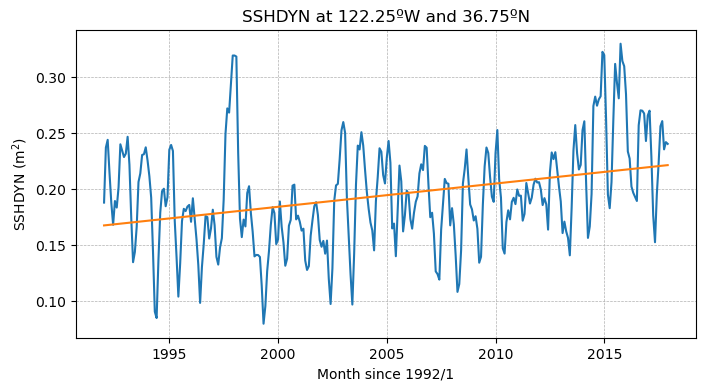

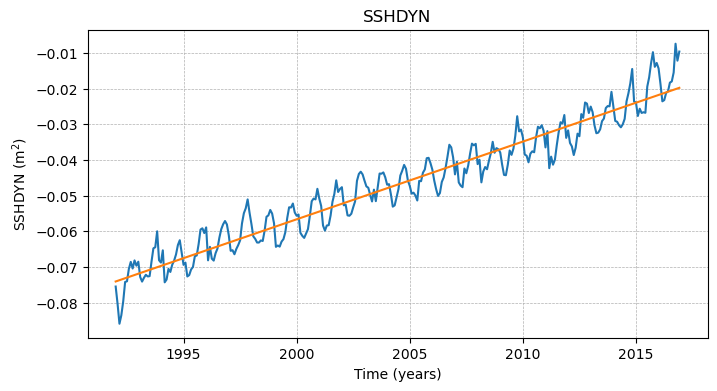

The slope of the trend line for California is 2.078mm/yr
The slope of the trend line for the world is 2.18mm/yr


In [9]:
# define a time array for months
months = np.arange(len(sshdyn_values))

# convert to "decimal years"
dec_yrs = 1992 + months/12

# compute the line coefficients
line_coefficients = np.polyfit(dec_yrs, sshdyn_values, 1)

# print the coefficients
#print(line_coefficients)

fig = plt.figure(figsize=(8,4))

# plot the data
plt.plot(dec_yrs, sshdyn_values)

# plot the trend line
m = line_coefficients[0]
b = line_coefficients[1]
plt.plot(dec_yrs, m*dec_yrs+b)

plt.title('SSHDYN at 122.25ºW and 36.75ºN')
plt.ylabel('SSHDYN (m$^2$)')
plt.xlabel('Month since 1992/1')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()


#Now globally
months2 = np.arange(len(sshdyn_all_values))
# convert to "decimal years"
dec_yrs2 = 1992 + months2/12
# compute the line coefficients
all_line_coefficients = np.polyfit(dec_yrs2, sshdyn_all_values, 1)

# print the coefficients
#print(all_line_coefficients)

fig = plt.figure(figsize=(8,4))
# plot the data
plt.plot(dec_yrs2, sshdyn_all_values)

# plot the trend line
c = all_line_coefficients[0]
d = all_line_coefficients[1]
plt.plot(dec_yrs2, c*dec_yrs2+d)

plt.title('SSHDYN')
plt.ylabel('SSHDYN (m$^2$)')
plt.xlabel('Time (years)')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

# print out the statistics in mm/yr for each timeseries'''
print("The slope of the trend line for California is "+str(round(line_coefficients[0]*1000, 3))+'mm/yr')
print("The slope of the trend line for the world is "+str(round(all_line_coefficients[0]*1000, 3))+'mm/yr')

### Question:
How does the trend in sea level rise in California compare to the global mean rate?

Answer: The trend in sea level rise is increasing at a slower rate than the global increase in height. We can see this because the slope for the trend lin in the California data is 2.08 and the global mean rate's slope is 2.18.

## Part 6: Plot the Timeseries of Sea Surface Height
Finally, plot the two timeseries on the same plot along with their trend lines. Be sure to label your axes and include a legend.

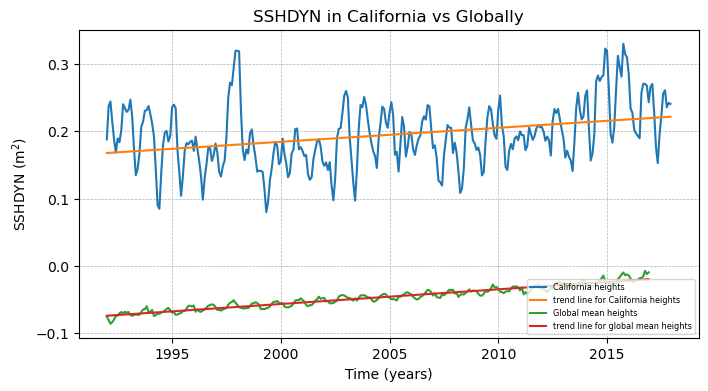

In [10]:
# create your plot here

# define a time array for months
months = np.arange(len(sshdyn_values))

# convert to "decimal years"
dec_yrs = 1992 + months/12

# compute the line coefficients
line_coefficients = np.polyfit(dec_yrs, sshdyn_values, 1)

# print the coefficients
#print(line_coefficients)

fig = plt.figure(figsize=(8,4))

# plot the data
plt.plot(dec_yrs, sshdyn_values, label = 'California heights')

# plot the trend line
m = line_coefficients[0]
b = line_coefficients[1]
plt.plot(dec_yrs, m*dec_yrs+b, label = 'trend line for California heights')

#Now globally
months2 = np.arange(len(sshdyn_all_values))
# convert to "decimal years"
dec_yrs2 = 1992 + months2/12
# compute the line coefficients
all_line_coefficients = np.polyfit(dec_yrs2, sshdyn_all_values, 1)

# print the coefficients
#print(all_line_coefficients)

# plot the data
plt.plot(dec_yrs2, sshdyn_all_values, label = 'Global mean heights')

# plot the trend line
c = all_line_coefficients[0]
d = all_line_coefficients[1]
plt.plot(dec_yrs2, c*dec_yrs2+d,label = 'trend line for global mean heights')

plt.title('SSHDYN in California vs Globally')
plt.ylabel('SSHDYN (m$^2$)')
plt.xlabel('Time (years)')
plt.grid(linestyle='--',linewidth=0.5)
plt.legend(loc="lower right", fontsize = 'xx-small')
plt.show()

### Questions:

How do the timeseries for Calfiornia and the global mean compare? Comment on their variability. What are the two highest years of sea level in California? What oceanographic phenomenon happened during this time?

Answer: The timeseries for California heights vary much more than the global mean heights. Each month through the years it's clear from the graph that there is much variability with the height increasing and decreasing. The two highest years of sea level in California seem to be 1998 and 2016. The el niño caused strange warm anomolies, increasing the air temperature by 1ºC. The same thing happened in 2016.